# DBSCAN Clustering

## Introduction

DBSCAN, or Density-Based Spatial Clustering of Applications with Noise, is a powerful unsupervised clustering algorithm that excels in discovering clusters of arbitrary shapes within datasets. Unlike traditional clustering algorithms that rely on predefined cluster centers, DBSCAN defines clusters based on the density of data points in the feature space. It is particularly effective in handling datasets with irregularly shaped clusters and identifying outliers or noise points.

### DBSCAN Algorithm

DBSCAN operates as follows:

1. **Density Estimation**: The algorithm begins by estimating the local density around each data point in the dataset. It does this by measuring the number of data points within a specified distance (radius) ε from each point. This radius parameter ε is a crucial input to the algorithm.

2. **Core Points**: DBSCAN identifies core points as those data points that have at least a minimum number of data points (minPts) within the ε neighborhood. These core points are considered the central elements of clusters.

3. **Connected Components**: The algorithm proceeds to form clusters by connecting core points that are within ε distance of each other. This step groups together core points that are densely connected, defining the core of each cluster.

4. **Expand Clusters**: DBSCAN expands clusters by assigning border points to the cluster of a core point. Border points are data points that are within ε distance of a core point but are not core points themselves. This step allows the clusters to grow beyond just the core points.

5. **Noise Points**: Any remaining data points that are neither core points nor border points are considered noise or outliers. These points do not belong to any cluster and are often labeled accordingly.

6. **Iterative Process**: DBSCAN repeats these steps for all data points in the dataset until all points are either assigned to a cluster or labeled as noise. The algorithm does not require the number of clusters (k) to be predetermined, which is a notable advantage.

DBSCAN's ability to create clusters based on data density rather than assuming predefined shapes or sizes makes it a robust and flexible clustering technique. The ε and minPts parameters are crucial for the algorithm's performance and may require experimentation and fine-tuning depending on the dataset's characteristics.

This algorithm is particularly useful when dealing with datasets that contain clusters of irregular shapes, varying densities, and noisy data points. It excels in scenarios where traditional clustering methods may struggle to provide meaningful results.

## Advantages and Disadvantages

### Advantages

- **Robust to Shape and Size**: DBSCAN can detect clusters of varying shapes, sizes, and densities, making it versatile in real-world scenarios.
- **Noise Tolerance**: It is capable of identifying and labeling noisy data points as outliers.
- **Automatic Cluster Detection**: DBSCAN can automatically determine the number of clusters without the need for specifying k in advance.
- **Suitable for Non-Uniform Data**: Effective in datasets with non-uniform cluster densities.

### Disadvantages

- **Sensitivity to Parameters**: The choice of ε and minPts parameters can impact the results and may require careful tuning.
- **Difficulty with High-Dimensional Data**: DBSCAN's performance may deteriorate in high-dimensional spaces due to the "curse of dimensionality."
- **Memory and Time Complexity**: The algorithm can have higher memory and time requirements for large datasets.

## Illustration

1. The data points are grouped into two main clusters, one colored red and the other blue, based on their density.
2. The green points represent noise — these are points that do not belong to any cluster due to their low density.
3. DBSCAN identifies clusters based on the density of data points, grouping nearby points and marking isolated points as noise.
4. This technique is particularly effective for data with clusters of varying shapes and sizes, as demonstrated by the moon-shaped clusters in the graph.
5. This visualization shows how DBSCAN can effectively identify clusters without needing to specify the number of clusters beforehand, unlike k-Means clustering.



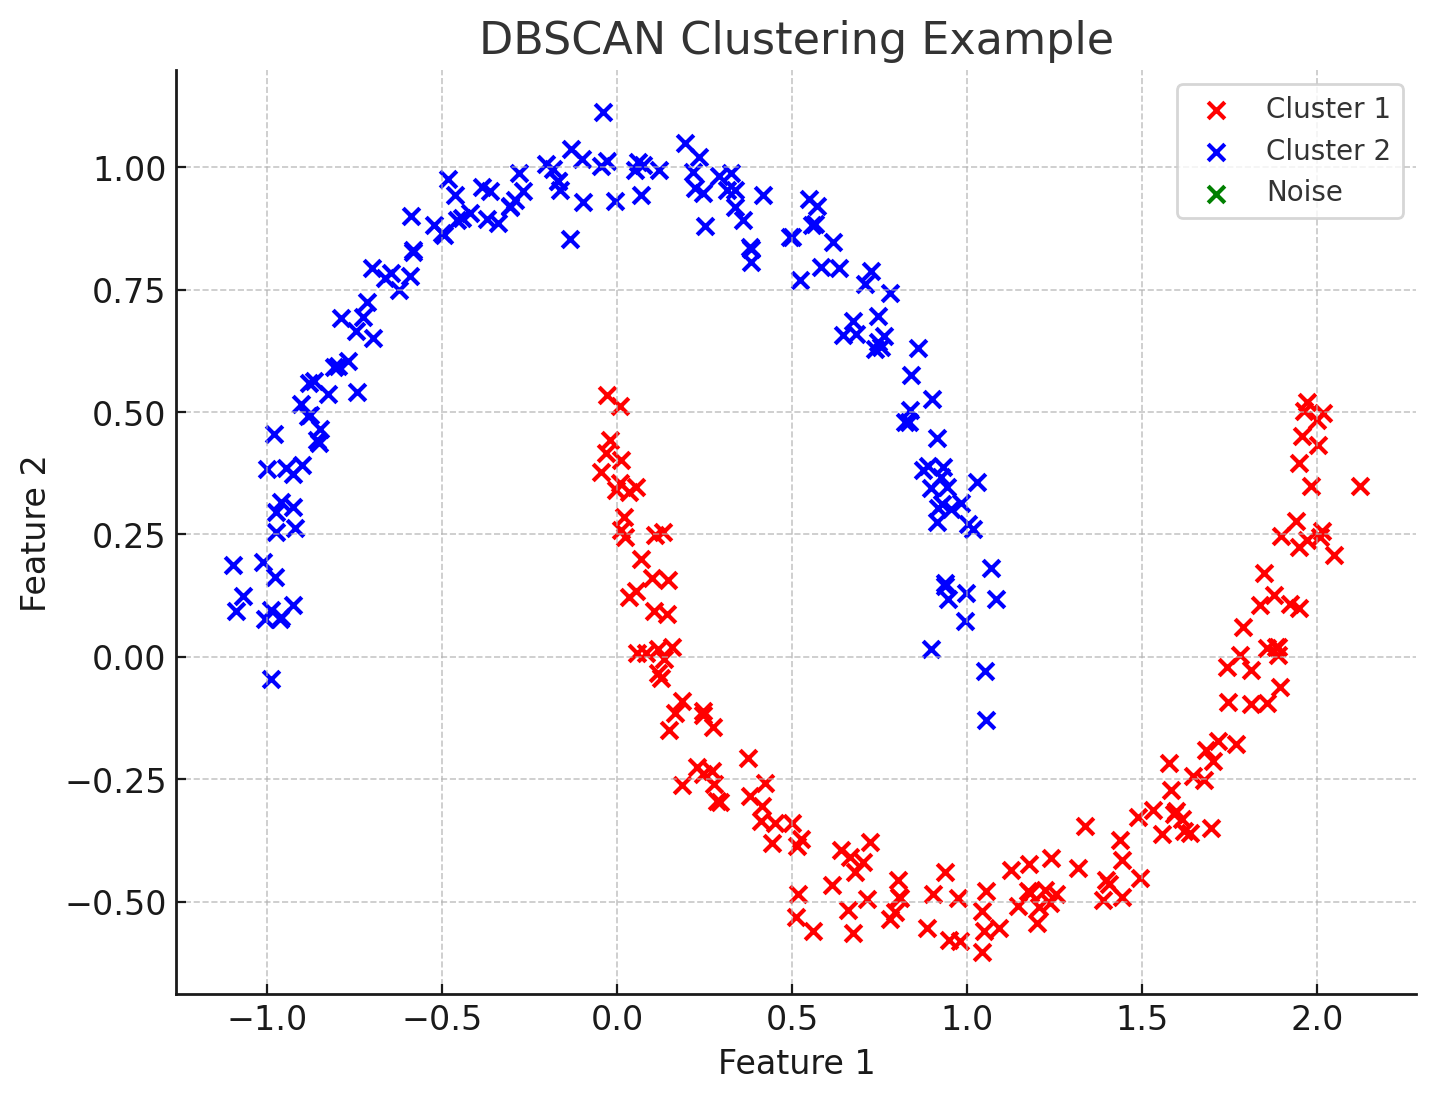



### Using the Make Swiss Roll Dataset

For our DBSCAN clustering project, we will employ the "make Swiss roll" dataset to explore how the algorithm can effectively identify and delineate non-linear clusters within complex data distributions. This dataset provides an excellent opportunity to showcase DBSCAN's strengths in clustering and noise detection.

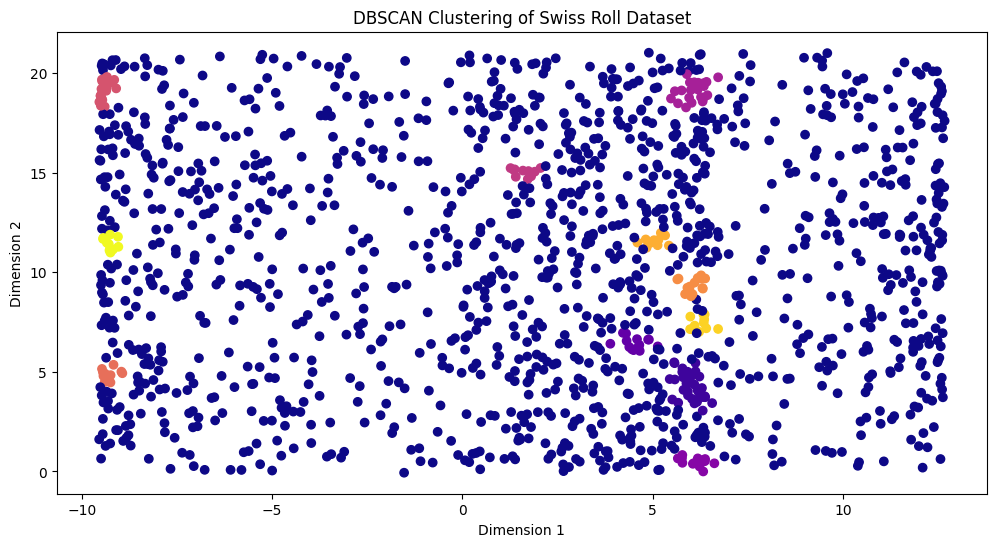

In [1]:
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Generate the Swiss roll dataset
X, _ = make_swiss_roll(n_samples=1500, noise=0.05)

# Use only the first two dimensions to simplify the problem
X = X[:, :2]

# Define the DBSCAN model
db = DBSCAN(eps=0.5, min_samples=10)

# Fit and predict the labels
y_pred = db.fit_predict(X)

# Plotting the cluster assignments
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='plasma')
plt.title('DBSCAN Clustering of Swiss Roll Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


### Define different combinations of eps and min_samples for DBSCAN

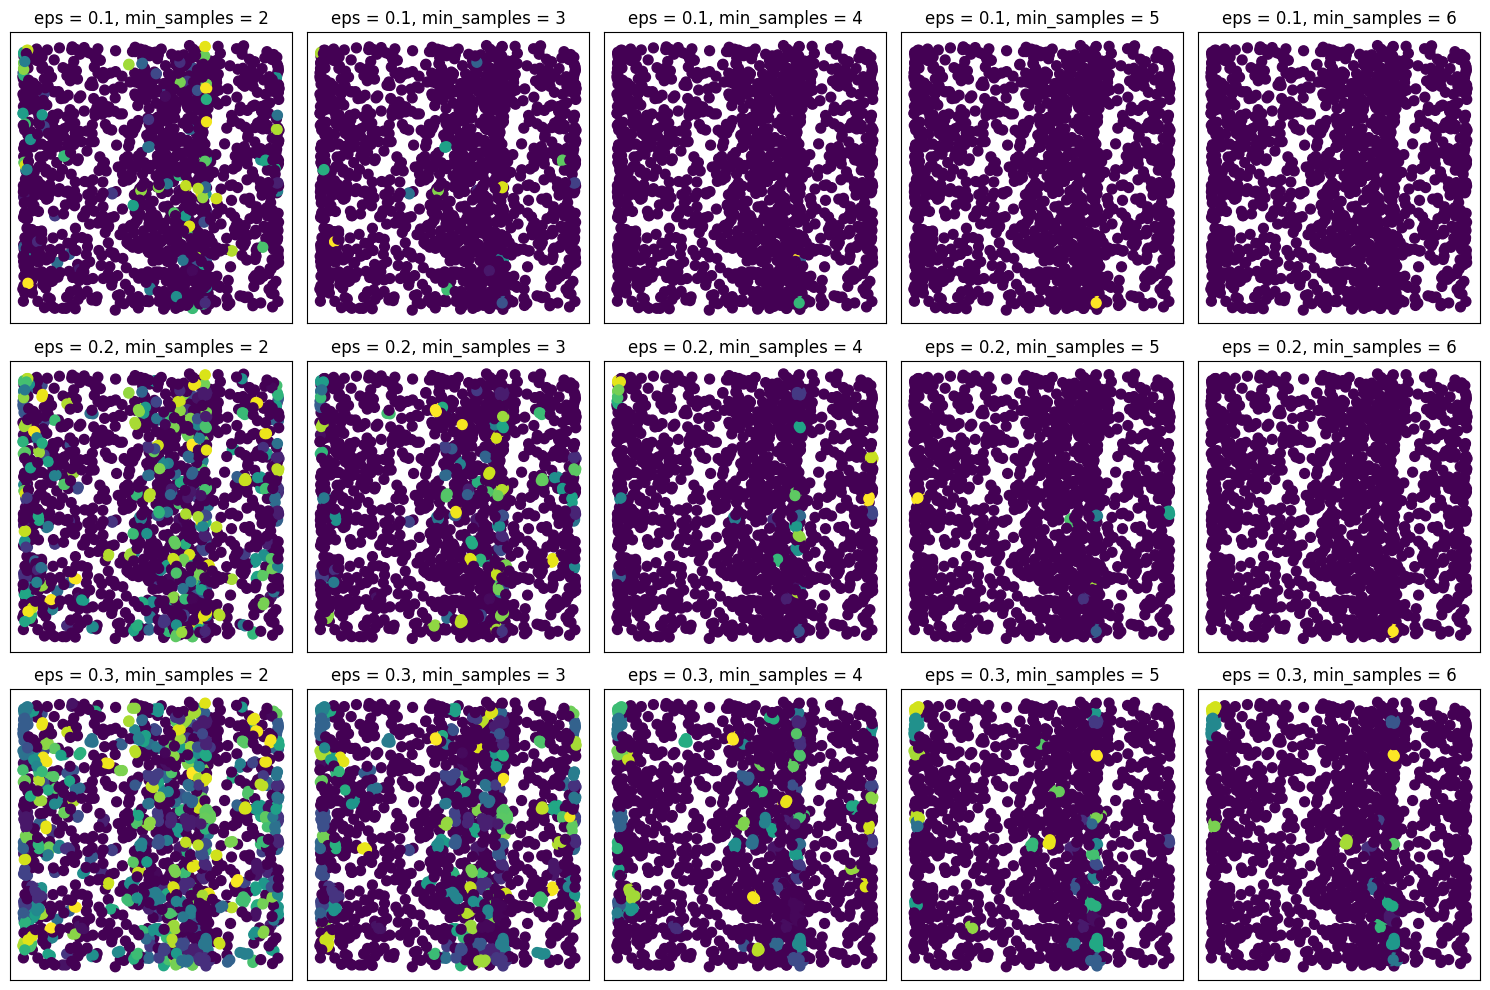

In [2]:
# Define different combinations of eps and min_samples for DBSCAN
eps_values = [0.1, 0.2, 0.3]
min_samples_values = [2, 3, 4, 5, 6]

# Create subplots
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 10))

# Iterate over all combinations of eps and min_samples
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Apply DBSCAN clustering
        db = DBSCAN(eps=eps, min_samples=min_samples)
        y_pred = db.fit_predict(X)

        # Plot the results
        axes[i, j].scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
        axes[i, j].set_title(f'eps = {eps}, min_samples = {min_samples}')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



The series of plots generated from the DBSCAN algorithm on the Swiss roll dataset, with varying `eps` (epsilon) and `min_samples` values, offer insightful visualizations into how these parameters influence clustering results:

## Epsilon (eps) Variations:

- **Lower eps (0.1)**: The clusters are very fragmented. A small `eps` value leads to many data points being considered as noise (outliers) because they don't have enough neighbors within this small radius.

- **Medium eps (0.2)**: Clusters start to form more cohesively compared to lower `eps`, but there's still a notable amount of noise. This setting begins to balance between distinguishing separate clusters and identifying outliers.

- **Higher eps (0.3)**: With an increased `eps`, the clusters become larger and more connected. However, this also risks merging distinct clusters into a single one if the `eps` is too large, potentially oversimplifying the dataset's structure.

## Minimum Samples (min_samples) Variations:

- **Lower min_samples (2, 3)**: Fewer points are needed to form a cluster, leading to more clusters being identified. This can be beneficial in a densely packed dataset but may result in over-clustering in sparse datasets.

- **Higher min_samples (4, 5, 6)**: Increasing `min_samples` generally results in fewer, more significant clusters. It demands more points to form a cluster, thus reducing sensitivity to noise. However, setting it too high might miss smaller, yet potentially meaningful clusters.

## Combined Effect:

- In plots with low `eps` and high `min_samples`, almost all points are classified as noise, indicating that the criteria for forming clusters are too stringent.

- Conversely, high `eps` with low `min_samples` tends to merge multiple clusters, losing finer details in the data structure.

## Insights and Practical Implications:

- Choosing `eps` and `min_samples` depends on the specific dataset characteristics and the clustering objectives. Fine-tuning these parameters is crucial for meaningful clustering results.

- Noise Identification: DBSCAN effectively identifies outliers, which is useful in anomaly detection.

- Cluster Shape and Size: DBSCAN does not assume spherical clusters (like K-means) and can thus identify clusters of arbitrary shapes and sizes, as evident in the Swiss roll dataset.

- Parameter Sensitivity: The plots underscore DBSCAN's sensitivity to its parameters, emphasizing the need for careful parameter selection based on the dataset's specific nature.


# Conclusion

In this Jupyter notebook, we explored the power and versatility of the DBSCAN algorithm in unsupervised clustering tasks. DBSCAN proved to be an invaluable tool for discovering clusters of arbitrary shapes and sizes within datasets, making it well-suited for a wide range of real-world applications.

Through visualizations with varying `eps` (epsilon) and `min_samples` parameters, we gained insights into the influence of these parameters on clustering results, highlighting the importance of careful parameter selection. DBSCAN's ability to identify noise, handle non-uniform data distributions, and adapt to complex cluster structures makes it a valuable addition to the data scientist's toolkit.
